In [ ]:
import glob
import csv
import pandas as pd
from bs4 import BeautifulSoup

#apple podcasts! repeat for spotify
#Take each file in html folder
#Loop through and pull out each description
#Add each description to row in csv

#source_0 ....source_99.html files to open and parse

templist = []
all_files=list(glob.glob('html2/*.html'))
#print(all_files)
index = 0 

for item in all_files:

    with open(f'html2/source_{index}.html') as infile:
        
        html = infile.read()
        soup = BeautifulSoup(html,'html.parser')

        #<div class='almost-silver'> has the description text on each page
        desc_divs = soup.find('div', {'class':'almost-silver'})
        desc = desc_divs.text
        templist.append(desc)
       #print(templist)
        
        index += 1

# create dataframe from list, save the dataframe to a csv
df = pd.DataFrame.from_dict(templist)
#print(df)

df.to_csv('apple-descriptions-scraped.csv')

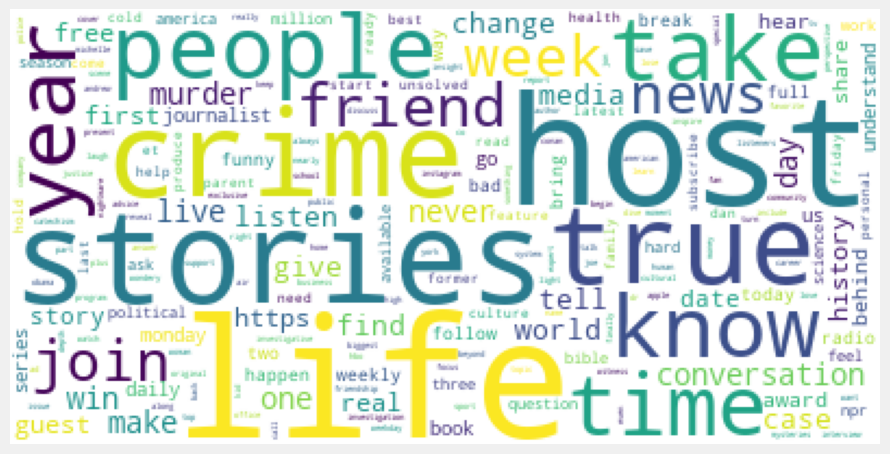

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
pd.set_option('display.max_colwidth', 80)
import matplotlib.patheffects as path_effects
import nltk
import numpy as np
import gensim
from gensim import corpora, models, similarities, downloader
from gensim.corpora import Dictionary
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter


#------ Define text cleaning functions -----#
def text_preprocessing(text):
    
    # Convert words to lower case
    text = text.lower()
    
    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]

    return text

def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

#-----Apple

apple = '/Users/annafeldman/Downloads/Web Scraping/apple-descriptions-scraped.csv'

with open(apple) as csvfile:

    apple_desc = pd.read_csv(csvfile)

    apple_desc = apple_desc[["Index","Description"]]
    #print(apple_desc)

    # Remove NA and duplicate values
    apple_desc = apple_desc.dropna(subset="Description")

    # # Create a list of review by applying text_preprocessing function
    apple_desc['Clean_List'] = list(map(text_preprocessing, apple_desc.Description))

    # # Return to string with to_string function
    apple_desc['Desc_Clean'] = list(map(to_string, apple_desc['Clean_List']))

    pd.set_option('display.max_colwidth', 15000)
    apple_desc.sample()

    # #from this, remove stopwords
    stopwords_list = stopwords.words('english')
    stopwords_list.extend(['podcast', 'every', 'episode', 'episodes','sometimes', 'show', 'things', 'new'])

    apple_desc['Clean_List'] = [[word for word in line if word not in stopwords_list] for line in apple_desc['Clean_List']]
    apple_desc['Desc_Clean'] = list(map(to_string, apple_desc['Clean_List']))

    # # Join all word corpus
    apple_desc_words = ','.join(list(apple_desc['Desc_Clean'].values)) #string of words
    #print(type(apple_desc_words)) #string

    # ----- Count and find the 30 most frequent words in descriptions 
    Counter = Counter(apple_desc_words.split())
    most_frequent_desc = Counter.most_common(30)
    #create and print datadrame list of most common words 
    most_frequent_desc = pd.DataFrame(most_frequent_desc, columns=("words","count"))
    #print(most_frequent_desc) #----success, comment out for now


#-------- Word Cloud ----#

    wordcloud = WordCloud(background_color="white",
                      max_words= 200,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(apple_desc_words)
    # Visualize the word cloud
    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    #---success, comment out for now


            words  count
0            life     21
1   conversations     10
2            host     10
3            know      9
4            time      9
5           world      9
6         stories      9
7        episodes      8
8             new      8
9        question      7
10           join      7
11        science      7
12           true      7
13           real      7
14           like      7
15         change      6
16             dr      6
17           hard      6
18          media      6
19          share      6
20          crime      6
21         people      6
22          brain      5
23          bring      5
24          start      5
25           tool      5
26           work      5
27       research      5
28           find      5
29          learn      5


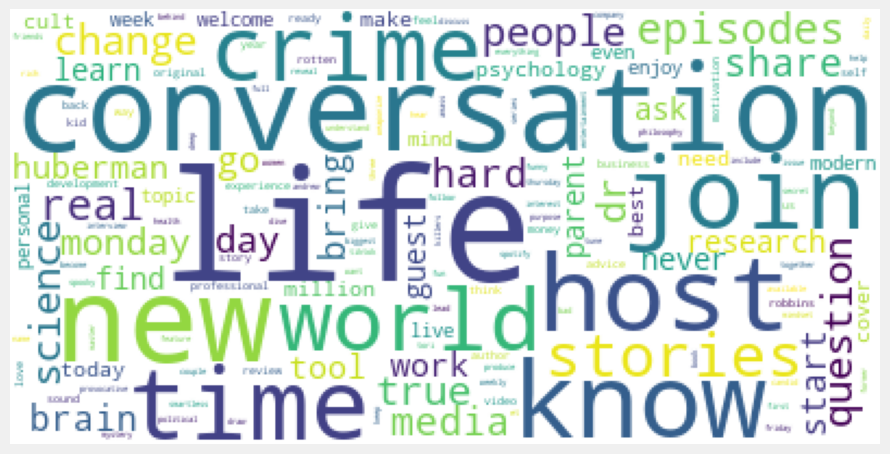

In [3]:
#------- SPOTIFY -----#
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
pd.set_option('display.max_colwidth', 80)
import matplotlib.patheffects as path_effects
import nltk
import numpy as np
import gensim
from gensim import corpora, models, similarities, downloader
from gensim.corpora import Dictionary
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter


#------ Define text cleaning functions -----#
def text_preprocessing(text):
    
    # Convert words to lower case
    text = text.lower()
    
    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]

    return text

def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

#------Read the data from csv into dataframe -----#

spotify = '/Users/annafeldman/Desktop/PFCH Final Project/spotify-us-charts.csv'

with open(spotify) as csvfile:

    spotify_data = pd.read_csv(csvfile)

    #Filter by title and description
    spotify_data = spotify_data[["Title", "Description"]]
    #spotify_data = spotify_data.drop_duplicates(subset='Title')

    # Remove NA and duplicate values
    spotify_data = spotify_data.dropna()

    # Create a list of review by applying text_preprocessing function
    spotify_data['Title_Clean_List'] = list(map(text_preprocessing, spotify_data.Title))
    spotify_data['Desc_Clean_List'] = list(map(text_preprocessing, spotify_data.Description))

    # Return to string with to_string function
    spotify_data['Title_Clean'] = list(map(to_string, spotify_data['Title_Clean_List']))
    spotify_data['Desc_Clean'] = list(map(to_string, spotify_data['Desc_Clean_List']))

    pd.set_option('display.max_colwidth', 15000)

    #from this, remove stopwords
    stopwords_list = stopwords.words('english')
    stopwords_list.extend(['mel', 'podcast', 'get', 'every', 'sometimes', 'show', 'episode','things', 'one'])

    spotify_data['Desc_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in spotify_data['Desc_Clean_List']]
    spotify_data['Desc_Clean'] = list(map(to_string, spotify_data['Desc_Clean_List']))

    # Join all word corpus
    spotify_desc_words = ','.join(list(spotify_data['Desc_Clean'].values)) #string of words
    spotify_title_words = ','.join(list(spotify_data['Title_Clean'].values))
    #print(type(spotify_desc_words)) #string type

    # Count and find the 30 most frequent words in descriptions 
    Counter = Counter(spotify_desc_words.split())
    most_frequent_desc = Counter.most_common(30)
    #create and print datadrame list of most common words 
    most_frequent_desc = pd.DataFrame(most_frequent_desc, columns=("words","count"))
    print(most_frequent_desc) 

# #------ Bar plot of frequent words----#

#     fig = plt.figure(1, figsize = (20,10))
#     _ = pd.DataFrame(most_frequent_desc, columns=("words","count"))
#     sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
#     plt.xticks(rotation=45);

#-------- Word Cloud ----#

    wordcloud = WordCloud(background_color="white",
                      max_words= 200,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(spotify_desc_words)
    # Visualize the word cloud
    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    #---success, comment out for now